In [10]:
import pandas as pd

# Read Excel Dataset
#file_path = r"C:\Users\12764\Desktop\本学期学习\KM6312\Dataset.xlsx" #the name of the file can be changed if needed
#data = pd.read_excel(file_path)
# Read Excel Dataset
file_path = "diamond_dataset.csv"  
data = pd.read_csv(file_path)

# Display the first five lines and the last five lines
print("First five lines of data:")
display(data.head())

print("Last five lines of data:")
display(data.tail())


First five lines of data:


,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,167889,Oval,E,I1,1.00,unknown,GIA,Very Good,Excellent,unknown,...,3.60,STK,VTK,unknown,Faint,unknown,unknown,unknown,unknown,5376
1,53087,Round,E,SI1,0.32,Excellent,GIA,Excellent,Excellent,Yes,...,2.71,STK,M,unknown,NaN,unknown,unknown,unknown,unknown,940
2,168079,Emerald,I,SI1,1.00,unknown,GIA,Very Good,Excellent,unknown,...,2.73,unknown,unknown,unknown,NaN,unknown,unknown,unknown,unknown,5400
3,194940,Round,D,VS2,1.03,Excellent,GIA,Excellent,Excellent,unknown,...,3.90,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,12893
4,58944,Round,I,SI2,0.40,Excellent,GIA,Excellent,Very Good,Yes,...,2.94,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,974


Last five lines of data:


,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
19995,174369,Marquise,H,VS2,1.03,unknown,GIA,Very Good,Very Good,unknown,...,3.14,TK,VTK,unknown,Faint,unknown,unknown,unknown,unknown,7046
19996,215888,Round,L,SI2,8.18,Excellent,IGI,Excellent,Excellent,unknown,...,8.03,unknown,unknown,unknown,NaN,unknown,unknown,unknown,unknown,48191
19997,202920,Round,J,SI1,2.00,Excellent,IGI,Excellent,Excellent,unknown,...,4.95,M,unknown,unknown,NaN,unknown,unknown,unknown,unknown,16892
19998,2254,Round,J,I1,0.31,Very Good,GIA,Very Good,Excellent,unknown,...,2.69,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,440
19999,57855,Round,D,VS2,0.30,Excellent,GIA,Very Good,Excellent,unknown,...,2.68,unknown,unknown,unknown,NaN,unknown,unknown,unknown,unknown,980


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

In [12]:
data = data.drop(columns=['Unnamed: 0'])
data = data.replace("unknown", pd.NA)

EDA

In [13]:
# Basic information
print("Data Dimension:", data.shape)

Data Dimension: (20000, 25)


In [14]:
sns.set(style="whitegrid", font_scale=1.2)

num_cols = data.select_dtypes(include=['float64', 'int64']).columns
print("Number of numerical features：", len(num_cols))
print("List of Numeric Features：\n", list(num_cols))

Number of numerical features： 7
List of Numeric Features：
 ['carat_weight', 'depth_percent', 'table_percent', 'meas_length', 'meas_width', 'meas_depth', 'total_sales_price']


In [15]:
desc_stats = pd.DataFrame({
    "Mean": data[num_cols].mean(),
    "Median": data[num_cols].median(),
    "Mode": data[num_cols].mode().iloc[0]  # 众数可能有多个，取第一行
})

print("Descriptive Statistics for Numeric Features：")
display(desc_stats)

Descriptive Statistics for Numeric Features：


,Mean,Median,Mode
carat_weight,0.755034,0.50,0.30
depth_percent,61.702230,62.50,62.60
table_percent,57.778048,58.00,57.00
meas_length,5.552405,5.07,4.27
meas_width,5.138265,4.83,4.30
meas_depth,3.289046,3.06,2.68
total_sales_price,6816.675200,2008.00,972.00


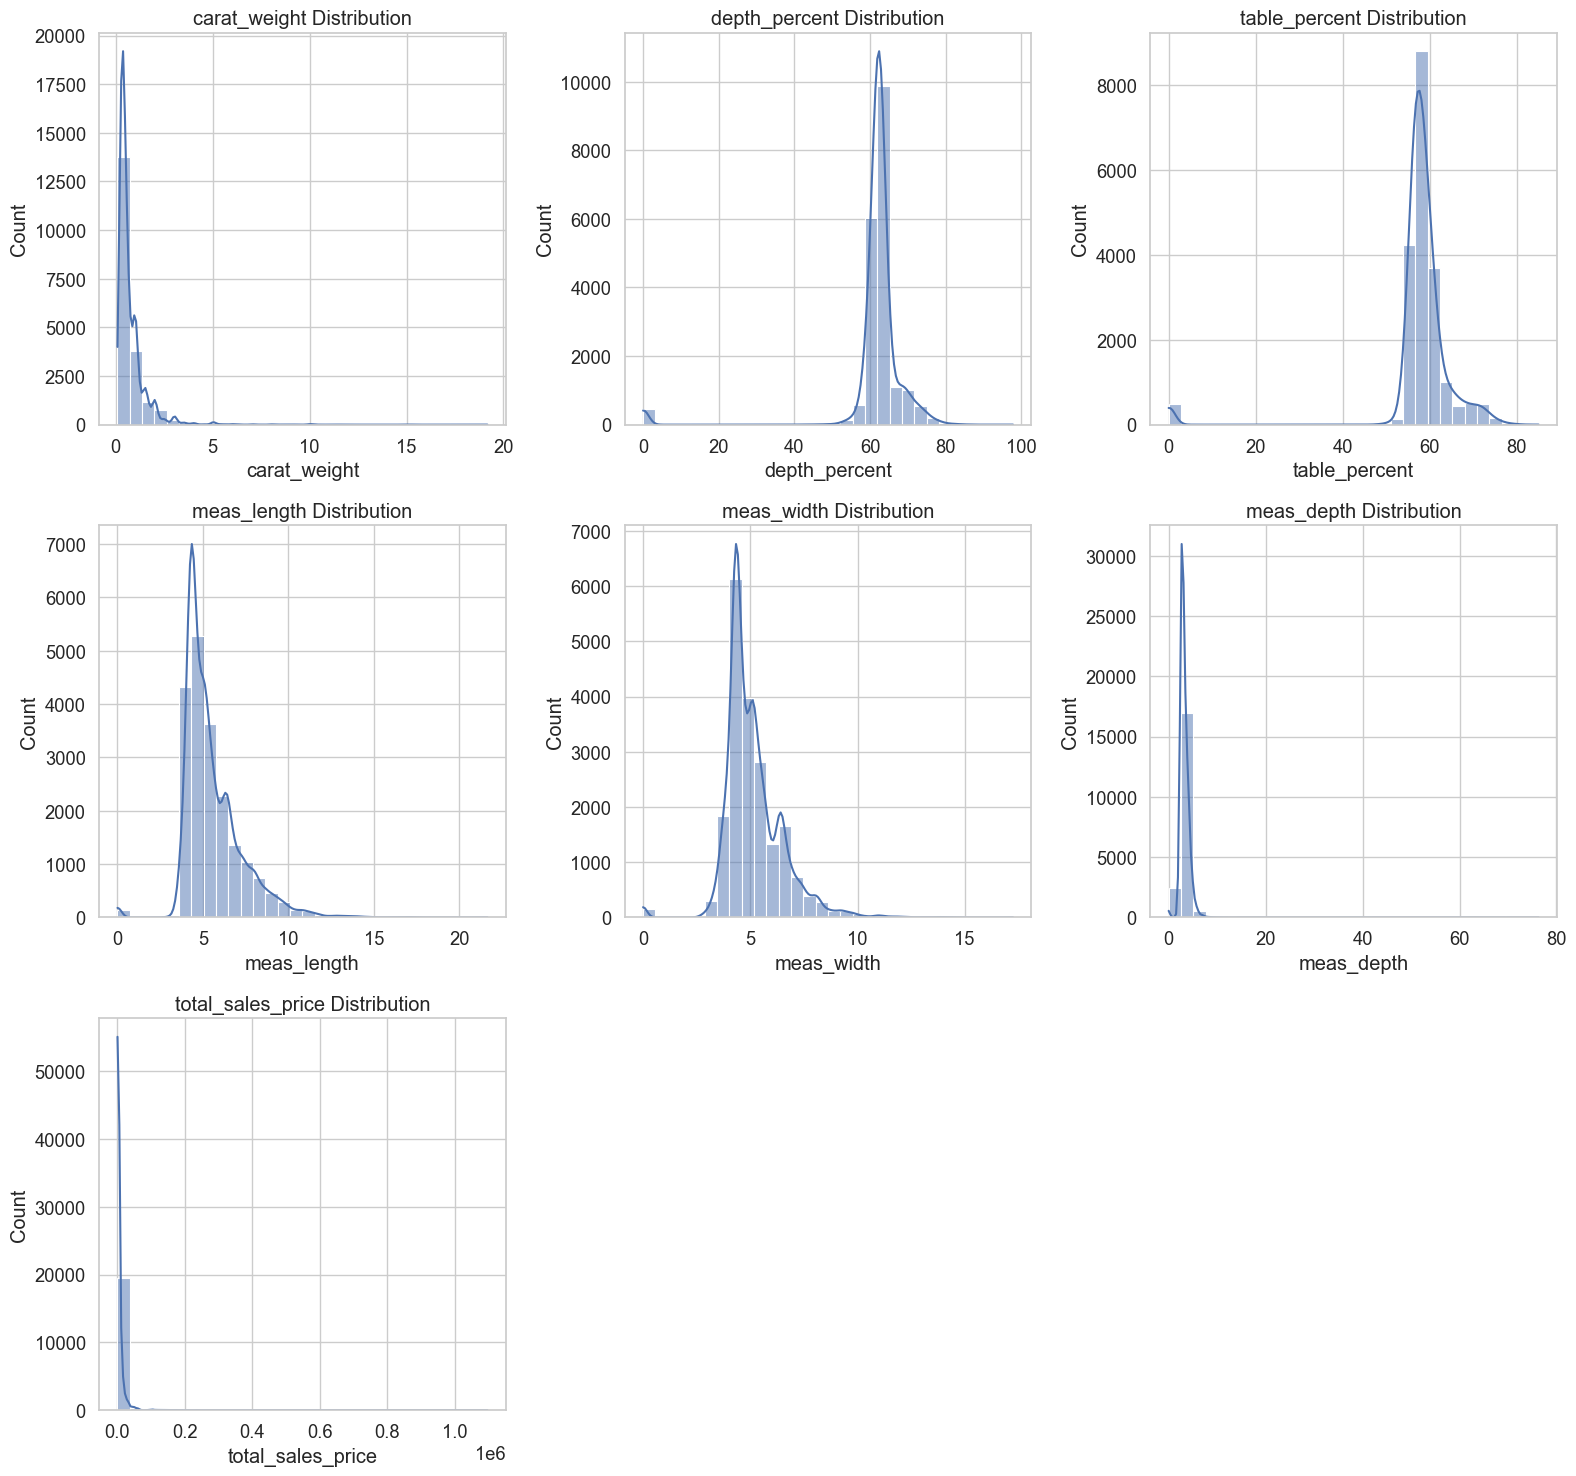

In [16]:
plt.figure(figsize=(16, 5 * ((len(num_cols) + 2) // 3)))

for i, col in enumerate(num_cols, 1):
    plt.subplot((len(num_cols) + 2) // 3, 3, i)
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

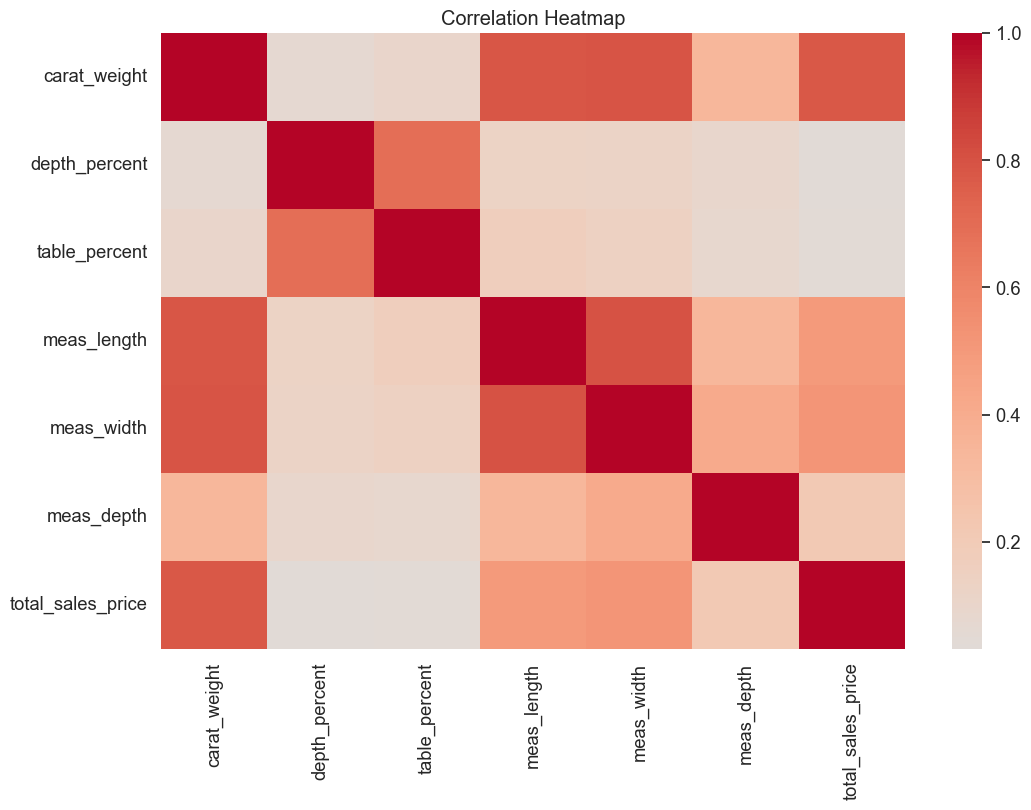

In [17]:
import seaborn as sns
plt.figure(figsize=(12,8))
corr = data.corr(numeric_only=True)
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

Data Preprocessing

In [18]:
data = data.drop(columns=['Unnamed: 0'])

KeyError: "['Unnamed: 0'] not found in axis"

In [8]:
data = data.replace("unknown", pd.NA)

In [9]:
num_cols = data.select_dtypes(include=['float64','int64']).columns
cat_cols = data.select_dtypes(include=['object']).columns

In [10]:
from sklearn.preprocessing import LabelEncoder
for col in cat_cols:
    data[col] = data[col].astype(str)
    data[col] = LabelEncoder().fit_transform(data[col])

Random Forest

In [11]:
X = data.drop(columns=['total_sales_price'])
y = data['total_sales_price']

In [12]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Building a Random Forest Model
rf = RandomForestRegressor(random_state=42, n_estimators=200)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [13]:
# Model Evaluation
y_pred = rf.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))

R² Score: 0.8121929617452488


In [14]:
#  Feature Importance Ranking
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

# The 15 Most Important Features Before Printing
print("\nTop 15 important features:")
print(importances.head(15))


Top 15 important features:
carat_weight                  0.676391
meas_width                    0.098473
color                         0.051985
meas_depth                    0.030941
depth_percent                 0.023708
clarity                       0.023516
table_percent                 0.019894
meas_length                   0.017593
fancy_color_intensity         0.009099
culet_size                    0.007842
girdle_max                    0.006949
girdle_min                    0.006415
fluor_intensity               0.006180
fancy_color_dominant_color    0.004980
cut                           0.003334
dtype: float64


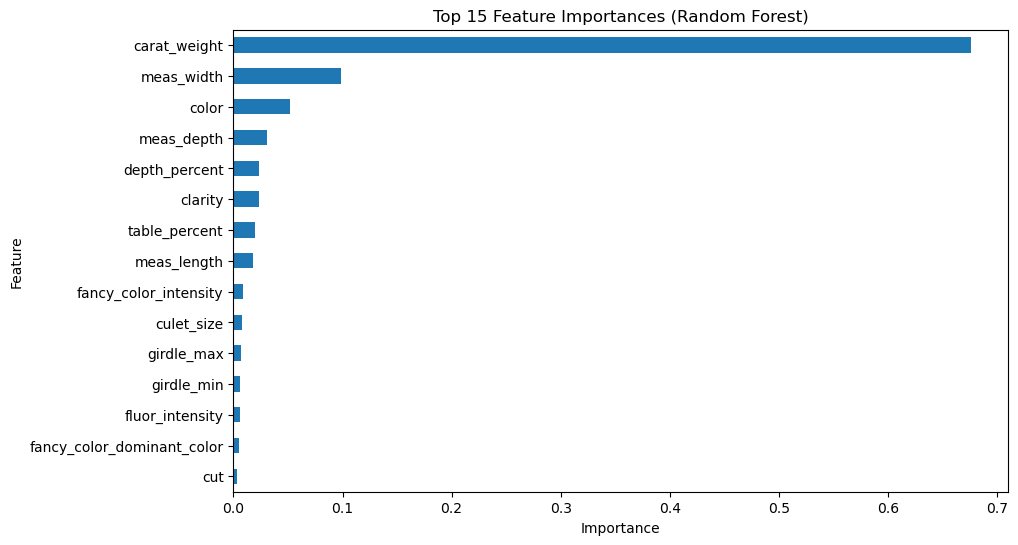

In [15]:
#  Visualization Demonstrates Feature Importance
plt.figure(figsize=(10, 6))
importances.head(15).plot(kind="barh")
plt.gca().invert_yaxis()
plt.title("Top 15 Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

XGBoost

In [16]:
!pip install xgboost

In [17]:
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#  Building an XGBoost Regression Model
xgb_model = xgb.XGBRegressor(
    n_estimators=300,        # The number of trees
    learning_rate=0.05,      # Learning rate
    max_depth=6,             # The maximum depth of each tree
    subsample=0.8,           # Sampling ratio
    colsample_bytree=0.8,    # Feature proportion used per tree
    random_state=42,
    n_jobs=-1
)

In [19]:
# Train the model
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=-1, num_parallel_tree=None, ...)

In [20]:
# Model Prediction
y_pred = xgb_model.predict(X_test)

# Model Evaluation
r2 = r2_score(y_test, y_pred)

print(f"R² Score: {r2:.4f}")

R² Score: 0.8723


In [21]:
# Feature Importance Extraction
importances = pd.Series(xgb_model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

print("\nTop 15 Important Features:")
print(importances.head(15))


Top 15 Important Features:
carat_weight       0.235992
meas_width         0.150933
meas_depth         0.101668
meas_length        0.077278
color              0.041511
girdle_min         0.039191
girdle_max         0.037435
clarity            0.033137
culet_size         0.032078
cut_quality        0.029773
depth_percent      0.029050
polish             0.025045
culet_condition    0.023789
fluor_intensity    0.022549
table_percent      0.019138
dtype: float32


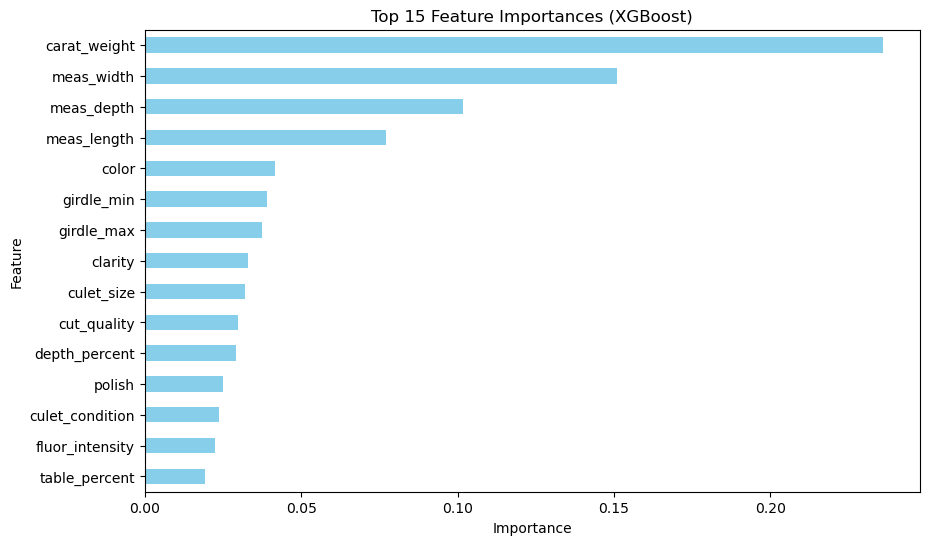

In [22]:
# Plot Feature Importance Bar Chart
plt.figure(figsize=(10, 6))
importances.head(15).plot(kind='barh', color='skyblue')
plt.gca().invert_yaxis()
plt.title("Top 15 Feature Importances (XGBoost)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

Classification

In [19]:
import pandas as pd

# Read the CSV file
df = pd.read_csv("/Users/cheongkahwai/Downloads/diamond_dataset.csv")

# Display the first 5 rows to confirm successful reading
print(df.head())

   Unnamed: 0      cut color clarity  carat_weight cut_quality  lab  \
0      167889     Oval     E      I1          1.00     unknown  GIA   
1       53087    Round     E     SI1          0.32   Excellent  GIA   
2      168079  Emerald     I     SI1          1.00     unknown  GIA   
3      194940    Round     D     VS2          1.03   Excellent  GIA   
4       58944    Round     I     SI2          0.40   Excellent  GIA   

    symmetry     polish eye_clean  ... meas_depth girdle_min  girdle_max  \
0  Very Good  Excellent   unknown  ...       3.60        STK         VTK   
1  Excellent  Excellent       Yes  ...       2.71        STK           M   
2  Very Good  Excellent   unknown  ...       2.73    unknown     unknown   
3  Excellent  Excellent   unknown  ...       3.90         TN           M   
4  Excellent  Very Good       Yes  ...       2.94          M         STK   

   fluor_color  fluor_intensity  fancy_color_dominant_color  \
0      unknown            Faint                     u

In [20]:
df = pd.read_csv("/Users/cheongkahwai/Downloads/diamond_dataset.csv")


In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency  # Analyze correlation between categorical features
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE  # Handle class imbalance

# 1. Define binary target variable (clarity: high/low)
# Reference for diamond clarity grades from highest to lowest: IF > VVS1 > VVS2 > VS1 > VS2 > SI1 > SI2 > I1
# Here, VS1 and above are defined as "high clarity (1)", others as "low clarity (0)"
high_clarity = ['IF', 'VVS1', 'VVS2','VS1']
df['clarity_class'] = df['clarity'].apply(lambda x: 1 if x in high_clarity else 0)

# 2. Encode categorical features (symmetry and other potential features)
le_symmetry = LabelEncoder()
df['symmetry_encoded'] = le_symmetry.fit_transform(df['symmetry'])  # Symmetry encoding

# Check target variable distribution (verify class balance)
print("Clarity binary classification distribution:")
print(df['clarity_class'].value_counts(normalize=True))

Clarity binary classification distribution:
clarity_class
0    0.52445
1    0.47555
Name: proportion, dtype: float64


Chi-square test results for symmetry vs clarity_class:
Chi2 value: 212.56 | p-value: 0.000000
Conclusion: Significant correlation (p<0.05)


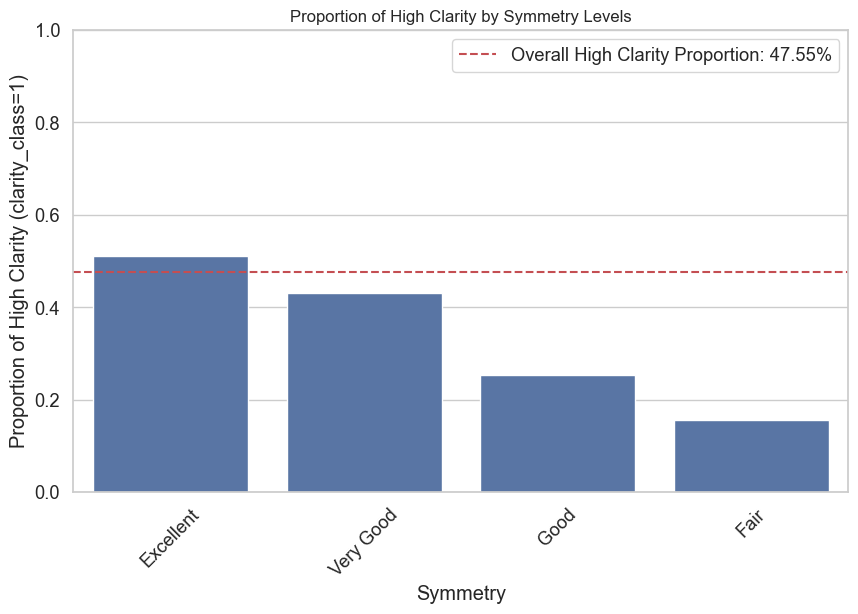

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# 1. Chi-square test: quantify correlation between symmetry and clarity class
contingency = pd.crosstab(df['symmetry'], df['clarity_class'])  # Contingency table: rows=symmetry categories, columns=clarity classes
chi2, p_value, dof, expected = chi2_contingency(contingency)

print(f"Chi-square test results for symmetry vs clarity_class:")
print(f"Chi2 value: {chi2:.2f} | p-value: {p_value:.6f}")
print("Conclusion: " + ("Significant correlation (p<0.05)" if p_value < 0.05 else "No significant correlation (p≥0.05)"))

# 2. Visualization: Distribution of clarity across different symmetry levels
plt.figure(figsize=(10, 6))
# Calculate the proportion of high clarity (1) for each symmetry category
symmetry_clarity_ratio = df.groupby('symmetry')['clarity_class'].mean().sort_values(ascending=False)
sns.barplot(x=symmetry_clarity_ratio.index, y=symmetry_clarity_ratio.values)
plt.axhline(
    y=df['clarity_class'].mean(), 
    color='r', 
    linestyle='--', 
    label=f'Overall High Clarity Proportion: {df["clarity_class"].mean():.2%}'
)
plt.title('Proportion of High Clarity by Symmetry Levels', fontsize=12)
plt.xlabel('Symmetry')
plt.ylabel('Proportion of High Clarity (clarity_class=1)')
plt.ylim(0, 1)  # Set y-axis range from 0 to 1 (0% to 100%)
plt.xticks(rotation=45)  # Rotate x-labels to avoid overlap
plt.legend()
plt.show()

Core solutions for fluctuations/declines in logistic regression results:
Fix random seeds and feature processing (to ensure consistency across runs);
Tune the regularization parameter C (to balance underfitting/overfitting);
Evaluate actual performance using cross-validation (to eliminate single-split bias);
Add interaction terms (to improve linear separability).

In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1. Fix random seed (critical! Ensure consistency in data splitting and model training across runs)
SEED = 42

# 2. Feature processing (strictly consistent encoding and standardization)
# Encode categorical features (e.g., symmetry, polish, cut_quality)
le = LabelEncoder()
for col in ['symmetry', 'polish', 'cut_quality']:
    df[f'{col}_encoded'] = le.fit_transform(df[col])  # Ensure encoding mapping is consistent every time

# Define feature set (using previously validated relevant features)
X = df[['symmetry_encoded', 'polish_encoded', 'cut_quality_encoded']]
y = df['clarity_class']

# 3. Fix data splitting (stratified sampling to ensure consistent class distribution in train/test sets)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=SEED, stratify=y  # Fix random_state=SEED
)

# 4. Strict standardization (logistic regression is extremely sensitive to feature scales)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit scaler only on training set to avoid data leakage
X_test_scaled = scaler.transform(X_test)  # Transform test set with the same scaler

In [45]:
# Test different regularization strengths (smaller C means stronger regularization, to avoid overfitting)
C_values = [0.01, 0.1, 1, 10, 100]
best_f1 = 0
best_C = 1

for C in C_values:
    # Train logistic regression (fix class_weight to handle imbalance)
    lr = LogisticRegression(
        C=C,  # Regularization strength
        class_weight='balanced',  # Balance class weights
        max_iter=2000,  # Ensure convergence
        random_state=SEED  # Fix model random seed
    )
    lr.fit(X_train_scaled, y_train)
    
    # Predict and calculate F1 (test different thresholds)
    y_proba = lr.predict_proba(X_test_scaled)[:, 1]
    for threshold in [0.4, 0.45, 0.5]:
        y_pred = (y_proba > threshold).astype(int)
        current_f1 = f1_score(y_test, y_pred)
        if current_f1 > best_f1:
            best_f1 = current_f1
            best_C = C
            best_threshold = threshold

print(f"Optimal parameters: C={best_C}, threshold={best_threshold}, best F1={best_f1:.4f}")

Optimal parameters: C=0.01, threshold=0.4, best F1=0.6313


In [46]:
# 1. Add feature interaction terms (to capture non-linear relationships)
df['sym_polish_interact'] = df['symmetry_encoded'] * df['polish_encoded']  # Symmetry × polish interaction term
X_new = df[['symmetry_encoded', 'polish_encoded', 'cut_quality_encoded', 'sym_polish_interact']]

# 2. Retrain (using optimal C and threshold)
X_train_new, X_test_new, y_train, y_test = train_test_split(
    X_new, y, test_size=0.2, random_state=SEED, stratify=y
)
scaler_new = StandardScaler()
X_train_new_scaled = scaler_new.fit_transform(X_train_new)
X_test_new_scaled = scaler_new.transform(X_test_new)

lr_new = LogisticRegression(C=best_C, class_weight='balanced', max_iter=2000, random_state=SEED)
lr_new.fit(X_train_new_scaled, y_train)
y_proba_new = lr_new.predict_proba(X_test_new_scaled)[:, 1]
print("F1 after adding interaction term (threshold=0.4):", f1_score(y_test, (y_proba_new > 0.4).astype(int)))

F1 after adding interaction term (threshold=0.4): 0.6438775510204081


LogisticRegression Model

In [49]:
# Train the model (automatically balance class weights)
model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',  # Assign higher weight to the minority class (high clarity)
    random_state=42
)
model.fit(X_train_scaled, y_train)

# Model prediction and evaluation
y_pred = model.predict(X_test_scaled)
print("Model evaluation metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 score: {f1_score(y_test, y_pred):.4f}")

Model evaluation metrics:
Accuracy: 0.5437
Precision: 0.5170
Recall: 0.6167
F1 score: 0.5625


The current model's F1 score (0.5672) is at a moderate level, mainly limited by the insufficient information from a single feature (symmetry). Optimization can be done in three directions: feature expansion, feature engineering, and model tuning. The specific steps are as follows:
1. Core Optimization: Add Highly Correlated Features
A single feature (symmetry) has limited predictive power. Adding previously validated relevant features (such as polish and cut_quality) can significantly improve the model's discriminative ability.

In [68]:
# 1. Encode more relevant features
le_polish = LabelEncoder()
le_cut_quality = LabelEncoder()
df['polish_encoded'] = le_polish.fit_transform(df['polish'])
df['cut_quality_encoded'] = le_cut_quality.fit_transform(df['cut_quality'])

# 2. Expand feature set (symmetry + polish + cut_quality)
X = df[['symmetry_encoded', 'polish_encoded', 'cut_quality_encoded']]
y = df['clarity_class']

# 3. Re-split the dataset and standardize
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

2. Feature Engineering: Use One-Hot Encoding for Unordered Categorical Features
Features like symmetry and polish are unordered categorical features (e.g., "Excellent" and "Very Good" have no inherent order). LabelEncoder may introduce false ordinal relationships, so one-hot encoding is more appropriate:


In [69]:
# One-hot encoding for unordered features (retain core features)
X_onehot = pd.get_dummies(df[['symmetry', 'polish', 'cut_quality']], drop_first=True)  # drop_first to avoid multicollinearity
y = df['clarity_class']

# Split and standardize
X_train, X_test, y_train, y_test = train_test_split(
    X_onehot, y, test_size=0.2, random_state=42, stratify=y
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

3. Model Tuning: Optimize Logistic Regression Parameters
Improve the model's generalization ability by adjusting regularization strength and solver:

In [70]:
# Tuned logistic regression model
model = LogisticRegression(
    C=0.1,  # Regularization strength (smaller C means stronger regularization to reduce overfitting)
    penalty='l2',  # L2 regularization (default, prevents overly large parameters)
    solver='saga',  # Supports multiple regularizations, suitable for high-dimensional data
    class_weight='balanced',
    max_iter=2000,
    random_state=42
)
model.fit(X_train_scaled, y_train)

# Evaluate the tuned model
y_pred = model.predict(X_test_scaled)
print("Tuned model evaluation metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 score: {f1_score(y_test, y_pred):.4f}")

Tuned model evaluation metrics:
Accuracy: 0.5503
Precision: 0.5244
Recall: 0.5815
F1 score: 0.5515


4. Threshold Adjustment: Balance Precision and Recall
The default threshold of 0.5 may not be optimal. Find the best threshold using the ROC curve:

In [71]:
from sklearn.metrics import roc_curve

# Calculate false positive rate and true positive rate at different thresholds
y_proba = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Find the threshold that maximizes F1 score (approximately between 0.4-0.5)
best_threshold = thresholds[np.argmax(tpr - fpr)]  # Maximize TPR-FPR (approximate optimal)
y_pred_adjusted = (y_proba > best_threshold).astype(int)

print(f"\nBest threshold: {best_threshold:.4f}")
print("Evaluation after threshold adjustment:")
print(f"F1 score: {f1_score(y_test, y_pred_adjusted):.4f}")


Best threshold: 0.5395
Evaluation after threshold adjustment:
F1 score: 0.5219


Dicision Tree Model

Optimal parameters: {'class_weight': 'balanced', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 10}

Decision Tree model evaluation metrics:
Accuracy: 0.5493
Precision: 0.5232
Recall: 0.5862
F1 score: 0.5529


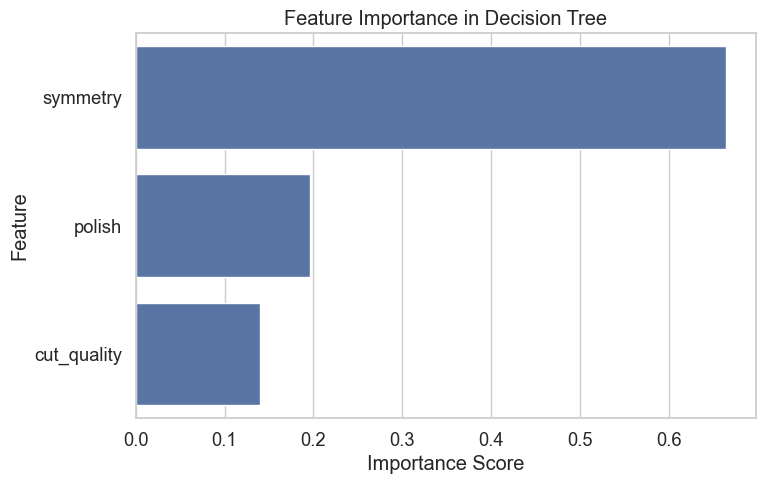


F1 score at threshold=0.4: 0.6400

F1 score at threshold=0.45: 0.6395

F1 score at threshold=0.5: 0.5529

F1 score at threshold=0.55: 0.5219


In [72]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# 1. Data preparation and feature encoding (using highly correlated features)
# Encode features: symmetry, polish, cut_quality (previously validated relevant features)
le = LabelEncoder()
for col in ['symmetry', 'polish', 'cut_quality']:
    df[f'{col}_encoded'] = le.fit_transform(df[col])

# Feature set (includes multiple relevant features to improve discriminative power)
X = df[['symmetry_encoded', 'polish_encoded', 'cut_quality_encoded']]
y = df['clarity_class']

# 2. Split into training and testing sets (stratified sampling)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Decision tree parameter tuning (find optimal parameters via grid search)
param_grid = {
    'max_depth': [3, 4, 5, 6, 7],  # tree depth: controls complexity to avoid overfitting
    'min_samples_split': [10, 20, 30],  # minimum samples required to split a node
    'min_samples_leaf': [5, 10, 15],  # minimum samples required at a leaf node
    'class_weight': ['balanced']  # balance class weights, focus on minority class
}

# Grid search + 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='f1',  # optimize for F1 score
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

# Optimal parameters
print(f"Optimal parameters: {grid_search.best_params_}")
best_dt = grid_search.best_estimator_

# 4. Model evaluation
y_pred = best_dt.predict(X_test)
print("\nDecision Tree model evaluation metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 score: {f1_score(y_test, y_pred):.4f}")

# 5. Visualize feature importance (to interpret the model)
feature_importance = pd.DataFrame({
    'Feature': ['symmetry', 'polish', 'cut_quality'],
    'Importance': best_dt.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance in Decision Tree')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

# 6. Adjust classification threshold (to further optimize F1)
y_proba = best_dt.predict_proba(X_test)[:, 1]  # predicted probability of positive class
thresholds = [0.4, 0.45, 0.5, 0.55]  # test different thresholds
for threshold in thresholds:
    y_pred_adjusted = (y_proba > threshold).astype(int)
    print(f"\nF1 score at threshold={threshold}: {f1_score(y_test, y_pred_adjusted):.4f}")

Optimal XGBoost parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'scale_pos_weight': 1.1027730319358655}

XGBoost evaluation metrics:
Accuracy: 0.5493
Precision: 0.5232
Recall: 0.5862
F1 score: 0.5529


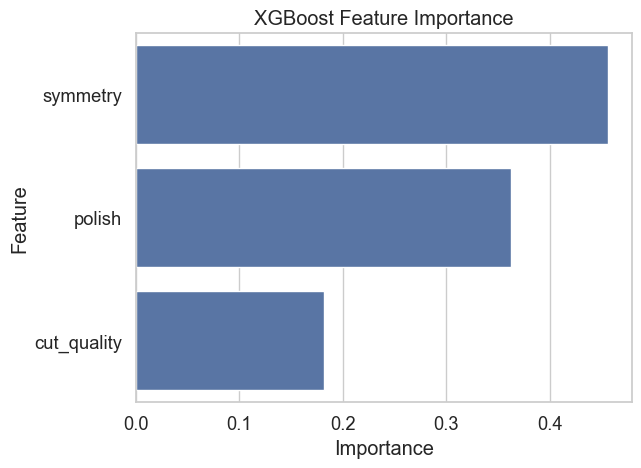

In [73]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# 1. Convert to XGBoost format (optional, improves efficiency)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# 2. Parameter tuning
param_grid_xgb = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.05],  # learning rate, controls the contribution of each tree
    'n_estimators': [100, 200],
    'scale_pos_weight': [len(y_train[y_train==0])/len(y_train[y_train==1])]  # balance positive and negative class weights (ratio of negative class to positive class)
}

grid_xgb = GridSearchCV(
    estimator=xgb.XGBClassifier(objective='binary:logistic', random_state=42),
    param_grid=param_grid_xgb,
    cv=5,
    scoring='f1',
    n_jobs=-1
)
grid_xgb.fit(X_train, y_train)

print(f"Optimal XGBoost parameters: {grid_xgb.best_params_}")
best_xgb = grid_xgb.best_estimator_

# 3. Evaluation
y_pred_xgb = best_xgb.predict(X_test)
print("\nXGBoost evaluation metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_xgb):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_xgb):.4f}")
print(f"F1 score: {f1_score(y_test, y_pred_xgb):.4f}")

# 4. Feature importance
xgb_importance = pd.DataFrame({
    'Feature': ['symmetry', 'polish', 'cut_quality'],
    'Importance': best_xgb.feature_importances_
}).sort_values('Importance', ascending=False)
sns.barplot(x='Importance', y='Feature', data=xgb_importance)
plt.title('XGBoost Feature Importance')
plt.show()